# Análisis de planes de telefonía: ¿cuál es el más rentable?

# Contenido
* [Introducción](#intro)
* [Objetivos](#objetivos)
* [Etapas](#etapas)
* [Inicialización: descripción de los datos](#a)
    * [Cargar los datos](#a1)
    * [Exploración inicial de los datos](#a2)
    * [Conclusiones del apartado](#a3)
* [Preprocesamiento de datos](#b)
    * [Corregir y enriquecer datos de users](#b1)
    * [Corregir y enriquecer datos de calls](#b2)
    * [Corregir y enriquecer datos de messages](#b3)
    * [Corregir y enriquecer datos de internet](#b4)
    * [Corregir y enriquecer datos de plans](#b5)
    * [Agregar datos por usuario](#b6)
* [Análisis exploratorio de datos y estudio del comportamiento del usuario](#c)
    * [Análisis exploratorio y descriptivo para el plan surf](#c1)
        * [Llamadas](#c11)
        * [Mensajes](#c12)
        * [Internet](#c13)
        * [Ingresos](#c14)
    * [Análisis exploratorio y descriptivo para el plan ultimate](#c2)
        * [Llamadas](#c21)
        * [Mensajes](#c22)
        * [Internet](#c23)
        * [Ingresos](#c24)
    * [Trabajando con los valores atípicos](#c3)
* [Probar las hipótesis estadísticas](#d)
    * [Primera hipótesis](#d1)
    * [Segunda hipótesis](#d2)
* [Conclusión general](#e)

# Introducción <a id='intro'></a>

En este proyecto analizaremos datos de la empresa de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago: Surf y Ultimate. El trabajo consiste en determinar cuál de estos planes genera más ingresos a la empresa. La(s) hipótesis específica(s) será(n) presentada(s) en los cuadros siguientes y para el desarrollo de este proyecto aplicaremos diversas técnicas utilizadas a lo largo del curso, como el preprocesamiento, análisis exploratorio y análisis estadístico de los datos. Cada espacio de código cuenta con sus respectivos comentarios para un mejor entendimiento del desarrollo del proyecto.

# Objetivos <a id='objetivos'></a>

Nuestras hipótesis específicas a probar serán las siguientes:
* Existe una diferencia entre el ingreso promedio de los ususarios de las tarifas Ultimate y Surf.
* Existe una diferencia entre el ingreso promedio de los usuario en el área de estados Nueva York-Nueva Jersey al de los usuarios de otras regiones.

# Etapas del análisis <a id='etapas'></a>

En este proyecto, seguiremos este esquema propuesto de manera general para ordenar el proceso de análisis. Se aclara que, debido a que no se tiene mucha información respecto a la calidad de los datos ni contacto con el área relacionada, el tratamiento de datos y análisis exploratorio se realizará usando supuestos razonables desde el punto de vista del analista. El esquema es:
1. Descripción de los datos
2. Preprocesamiento de los datos
3. Análisis exploratorio de datos
4. Prueba de las hipótesis
5. Conclusiones finales

# Inicialización: descripción de los datos <a id='a'></a>

**Carga de librerías necesarias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Cargar todas las librerías

## Cargar los datos <a id='a1'></a>

En este caso, se nos proporcionan cinco diferentes datasets con la información necesaria para realizar el proceso analítico. Cada DataFrame tiene un nombre relacionado a su tabla de origen de manera explícita.

In [2]:

try:
    users = pd.read_csv("megaline_users.csv")
    calls = pd.read_csv("megaline_calls.csv")
    messages = pd.read_csv("megaline_messages.csv")
    internet = pd.read_csv("megaline_internet.csv")
    plans = pd.read_csv("megaline_plans.csv")
except:
    users = pd.read_csv("/datasets/megaline_users.csv")
    calls = pd.read_csv("/datasets/megaline_calls.csv")
    messages = pd.read_csv("/datasets/megaline_messages.csv")
    internet = pd.read_csv("/datasets/megaline_internet.csv")
    plans = pd.read_csv("/datasets/megaline_plans.csv")
# Carga los archivos de datos en diferentes DataFrames

## Exploración inicial de datos <a id='a2'></a>

Para mantener el desarrollo ordenado, realizaremos cada paso del preprocesamiento para cada tabla, de la forma que sigue:

**Exploración de la tabla `users`**

Dentro de esta tabla, contamos con la siguiente información según su descripción:
* `user_id`: identificador único del usuario.
* `first_name`: nombre del usuario.
* `last_name`: apellido del usuario.
* `age`: edad del usuario en años.
* `reg_date`: fecha de suscripción (dd, mm, aa).
* `churn_date`: fecha en que el usuario dejó de usar el servicio (si es ausente, la tarifa se estaba usando al momento de recuperar los datos).
* `city`: ciudad de residencia del usuario.
* `plan`: nombre de la tarifa.

Ahora obtendremos su información:

In [3]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [4]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Detallando por columnas, tenemos:
* `user_id` no parece mostrar problemas.
* `first_name` no parece mostrar problemas.
* `last_name` no parece tener problemas.
* `age` no parece tener problemas.
* `city` no parece mostrar problemas.
* `reg_date` tiene un formato inadecuado para su análisis. Se necesita cambiar al formato fecha.
* `plan` no parece tener problemas.
* `churn_date` tiene gran cantidad de valores ausentes, pero recordemos que esta columna solo tiene información de la fecha donde las personas que terminaron sus planes. Es decir, si la mayoría de personas aún siguen usando sus planes (algo razonable), esperaríamos tener pocos registros no nulos. En todo caso, al tratarse de fechas, también requeriría un cambio de formato.

Ya que parece que nuestras columnas numéricas no parecen tener problemas, necesitamos más información sobre las columnas categóricas para continuar con el análisis:

In [6]:
users_categ = users[['first_name', 'last_name', 'city', 'plan']] # separa columnas categóricas
for column in users_categ:
    try:
        print(f"Valores únicos de la columna '{column}':") # muestra el nombre
        print(users_categ[column].unique()) # valores únicos de cada columna
        print()
    except:
        print("Error al mostrar valores únicos de users_categ")

Valores únicos de la columna 'first_name':
['Anamaria' 'Mickey' 'Carlee' 'Reynaldo' 'Leonila' 'Livia' 'Jesusa'
 'Eusebio' 'Emely' 'Gerry' 'Wilber' 'Halina' 'Jonelle' 'Nicolas' 'Edmundo'
 'Beata' 'Jann' 'Boris' 'Dennis' 'Shizue' 'Rutha' 'Ricarda' 'Bo' 'Jack'
 'Yuki' 'Jess' 'Meggan' 'Georgeanna' 'Jefferey' 'Franklyn' 'Chase' 'Lane'
 'Delila' 'Latoyia' 'Jc' 'Jeff' 'Myron' 'Reena' 'Olympia' 'Flo' 'Paris'
 'Drucilla' 'Clementina' 'Carlos' 'Devora' 'Barney' 'Yuk' 'Linwood'
 'Loise' 'Jone' 'Rosario' 'Edmond' 'Piper' 'Denis' 'Patrick' 'Theo'
 'Reinaldo' 'Avril' 'Denisse' 'Maryam' 'Kristeen' 'Larhonda' 'Gerardo'
 'Sherlyn' 'Ariel' 'Robt' 'Marcel' 'Dino' 'Jacelyn' 'Isa' 'Seymour'
 'Grady' 'Particia' 'Salena' 'Ronny' 'Chau' 'Earnest' 'Brian' 'Neal'
 'Grayce' 'Dominic' 'Lyndia' 'Wiley' 'Ignacio' 'Adena' 'Lenard' 'Malena'
 'Brock' 'Taylor' 'Taren' 'Karima' 'Walter' 'Lilliam' 'Song' 'Deandre'
 'Collin' 'Shavon' 'Aaron' 'Sage' 'Marquitta' 'Moises' 'Thurman' 'Micheal'
 'Eddy' 'Porfirio' 'Anderson' 'Bo

In [7]:
for column in users_categ:
    try:
        print(f"Distribución de valores de la columna '{column}':") # nombre de la columna
        print(users_categ[column].value_counts(dropna=False, normalize=True)) # distribución de valores porcentuales
        print()
    except:
        print("Error al mostrar la distribución de users_categ")

Distribución de valores de la columna 'first_name':
Leonila     0.006
Jasper      0.006
Seymour     0.006
Lucius      0.004
Errol       0.004
            ...  
Olin        0.002
Hai         0.002
Shay        0.002
Rebbecca    0.002
Shena       0.002
Name: first_name, Length: 458, dtype: float64

Distribución de valores de la columna 'last_name':
David        0.006
Morrison     0.006
Grimes       0.006
Kelley       0.006
Velazquez    0.006
             ...  
Cain         0.002
Robinson     0.002
Adkins       0.002
Bean         0.002
Dickson      0.002
Name: last_name, Length: 399, dtype: float64

Distribución de valores de la columna 'city':
New York-Newark-Jersey City, NY-NJ-PA MSA          0.160
Los Angeles-Long Beach-Anaheim, CA MSA             0.058
Dallas-Fort Worth-Arlington, TX MSA                0.042
Chicago-Naperville-Elgin, IL-IN-WI MSA             0.038
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    0.034
                                                   ...  
Raleigh-C

El restante detalle que nos faltaba acerca de las columnas categóricas nos muestra que aparentemente este dataset no parece tener más problemas aparte de los ya mencionados. Una mención aparte para los nombres de la ciudades, cuyos nombres explícitos necesitan ser resumidos de alguna forma. Por ahora, continuamos con la siguiente tabla.

**Exploración inicial de la tabla `calls`**

Esta tabla presenta los siguientes datos según su descripción:
* `id`: identificador único de la llamada.
* `call_date`: fecha de la llamada.
* `duration`: duración de la llamada en minutos.
* `user_id`: identificador del usuario que realiza la llamada.

Ahora obtendremos la información de esta tabla:

In [8]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [9]:
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


En esta tabla, tenemos lo siguiente:
* `id` no parece mostrar problemas.
* `user_id` no parece mostrar problemas.
* `call_date` necesita un cambio de formato a fechas para un mejor análisis.
* `duration` no parece tener problemas.

En este caso, no tenemos más tipos de datos por explorar y no parecen tener problemas. Solo un pequeño detalle en la descripción nos alerta sobre las llamadas de 0.0 de duración. Por ahora, continuamos con la siguiente tabla.

**Exploración inicial de la tabla `messages`**

Este dataset tiene la siguiente información:
* `id`: identificador único del SMS.
* `message_date`: fecha del SMS.
* `user_id`: identificador del usuario que manda el SMS.

A continuación, obtenemos los principales datos de la tabla:

In [11]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [12]:
messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


En esta tabla notamos lo siguiente:
* `id` no parece mostrar problemas.
* `message_date` necesita un cambio de formato a fecha para que sea coherente y útil.
* `user_id` no parece tener problemas, excepto el hecho de que no aparecen los usuarios con código 1498 y 1499. Una hipótesis al respecto es que estos usuarios no usaron los SMS para comunicarse en este periodo de tiempo.

Ya que esta tabla no aparenta tener más problemas, continuamos con la siguiente.

**Exploración inicial de la tabla `internet`**

En esta tabla tenemos la siguiente información:
* `id`: identificador único de la sesión.
* `mb_used`: volumen de datos gastados durante la sesión (en MB).
* `session_date`: fecha de la sesión web.
* `user_id`: identificador del usuario.

Continuamos con explorar los datos de la tabla:

In [14]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [15]:
internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


En este DataFrame, tenemos:
* `id` no parece tener problemas.
* `user_id` no parece mostrar problemas.
* `session_date` podría requerir un cambio de formato a fecha para mejorar el análisis.
* `mb_used` no parece mostrar problemas, exceptuando por la unidad de medida que podría requerir un cambio y ajuste para estar en línea con las tarifas vigentes de la empresa.

Dado que no existen más columnas a analizar ni problemas aparentes, continuamos con el último set de datos.

**Exploración inicial de la columna `plans`**

En este dataset, tenemos la siguiente información:
* `plan_name`: nombre de la tarifa.
* `usd_monthly_fee`: pago mensual en dólares estadounidenses.
* `minutes_included`: minutos incluidos al mes.
* `messages_included`: SMS incluidos al mes.
* `mb_per_month_included`: datos incluidos al mes (en MB).
* `usd_per_minute`: precio por minuto tras exceder los límites del paquete.
* `usd_per_message`: precio por SMS tras exceder los límites del paquete.
* `usd_per_gb`: precio por gigabyte de los datos extra tras exceder los límites del paquete.

En base a esta información, exploramos la tabla:

In [17]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [18]:
plans.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [19]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


No es necesario hacer un análisis por columna debido a que esta tabla tiene información sobre los planes y lo que integran. No existen datos faltantes, y se podría necesitar una corrección para los MB descritos en la tabla.

Sobre los planes, esta es su descripción:

**Surf**
<br>Pago mensual: 20$
<br>500 minutos al mes, 50 SMS y 15 GB de datos
<br>Si se exceden los límites del paquete:
<br>1 minuto: 3 centavos
<br>1 SMS: 3 centavos
<br>1 GB de datos: 10$

**Ultimate**
<br>Pago mensual: 70$
<br>3000 minutos al mes, 1000 SMS y 30 GB de datos
<br>Si se exceden los límites del paquete:
<br>1 minuto: 1 centavo
<br>1 SMS: 1 centavo
<br>1 GB de datos: 7$

Ya que no precisamos de realizar más exploraciones por ahora, continuaremos con el preprocesamiento de los datos, sin antes dar las conclusiones del apartado.

## Conclusiones del apartado <a id='a3'></a>

De todos los DataFrames analizados, tenemos las siguientes conclusiones:

Nuestras tablas, en general, no cuentan con grandes problemas relacionados a datos ausentes. Estas tablas tienen la información necesaria para poder realizar el análisis requerido. 
* La tabla `users` solo requiere corregir el formato hacia fechas, posiblemente también se necesite obtener información resumida sobre las ciudades, y tratar los valores ausentes relacionados a los clientes que aún tienen un plan activo.
* La tabla `calls` también requiere la correción de fechas, una revisión de las llamadas de 0 de duración y convertir la duración de las llamadas hacia la forma en que el tarifario de la empresa funciona.
* La tabla `messages` solo precisa de corregir el formato de fechas.
* La tabla `internet` requiere corregir el formato de fechas y la unidad de medida de MB hacia GB.
* La tabla `plans` solo requiere cambios en la unidad de medida de MB hacia GB.

# Preprocesamiento de datos <a id='b'></a>

En este apartado continuaremos con el esquema por tablas, realizando en tratamiento necesario para cada caso en base a las conclusiones del último apartado. Empezaremos con la tabla `users`.

## Corregir y enriquecer datos de `users` <a id='b1'></a>

Recordemos que esta columna requería de corregir el formato de fechas de su columna `reg_date` y `churn_date`, a la vez que esta última presentaba valores ausentes de los que sabemos su naturaleza de origen. Empezaremos con `reg_date`:

In [20]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d') # cambia hacia formato fecha
users['reg_date'].head()

0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
Name: reg_date, dtype: datetime64[ns]

Una vez comprobado que la transformación fue efectiva, continuamos con `churn_date`:

In [21]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d') # cambia hacia formato fecha
users['churn_date'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: churn_date, dtype: datetime64[ns]

Recordamos también que esta columna en su mayor parte cuenta con valores ausentes debido a que solo se registra para casos en donde los cientes dejaron de usar su respectivo plan. Por ahora no requerimos informacióna cerca de esta columna, así que la dejaremos con esa información. 

Contaremos si esta columna cuenta con duplicados explícitos como último paso:

In [22]:
users.duplicated().sum() # suma total de duplicados explícitos

0

Por ahora, corregimos las columnas y continuaremos con la siguiente tabla.

## Corregir y enriquecer datos de `calls` <a id='b2'></a>

Recordemos que esta tabla requería corregir el formato de fechas de su columna `call_date`. Ese será el primer cambio que realizaremos a continuación:

In [23]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') # cambia a formato fecha
calls['call_date'].head()

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]

Ahora que este problema está corregido, otro problema presente era que teníamos llamadas de 0.0 minutos de duración, de los cuales se sospecha que se tratan de llamadas perdidas. Este tipo de llamadas debería tener una frecuencia considerable si siguiera ese comportamiento. En ese caso, llamaremos a la columna correspondiente en porcentajes para obtener la frecuencia:

In [24]:
calls['duration'].value_counts(normalize=True).head() # valores más frecuentes en porcentaje

0.00    0.194823
4.02    0.000741
8.37    0.000741
3.91    0.000733
4.30    0.000726
Name: duration, dtype: float64

Tal como se sospechaba, un 19 % de estos datos corresponden a ese tipo de llamadas de duración anormal. Si analizamos un poco, este tipo de llamadas no se suman al tarifario de planes ni a los costos extra de la empresa, es decir, no se traduce en ingresos reales en la empresa. Por tanto, se trata de información no relevante para el análisis. Tener en cuenta estos datos en adelante podría sesgar o distorsionar nuestas conclusiones, indicadores y coeficientes que podríamos obtener en el futuro. Debido a eso, concluimos que continuaremos nuestro análisis prescindiendo de estas filas donde la duración de la llamada sea igual a 0.0 minutos.

In [25]:
calls = calls.query("duration != 0").reset_index() # filas donde duración es diferente a cero
calls['duration'].value_counts(normalize=True).head()

8.37    0.000920
4.02    0.000920
3.91    0.000911
7.61    0.000902
4.30    0.000902
Name: duration, dtype: float64

Podemos ver que el problema está solucionado. El siguiente problema a solucionar es que recordemos que Megaline tiene un tarifario que indica que las llamadas individuales se redondean hacia arriba: un segundo ya se redondea hacia un minuto. Generaremos esta información nueva usando el método "ceil()" y agregando una nueva columna a esta tabla:

In [26]:
calls['duration_rounded'] = calls['duration'].apply(np.ceil).astype('int') # aplica el redondeo de numpy y lo convierte a entero
calls.head()

,index,id,user_id,call_date,duration,duration_rounded
0,0,1000_93,1000,2018-12-27,8.52,9
1,1,1000_145,1000,2018-12-27,13.66,14
2,2,1000_247,1000,2018-12-27,14.48,15
3,3,1000_309,1000,2018-12-28,5.76,6
4,4,1000_380,1000,2018-12-30,4.22,5


Finalizado, también debemos tener en cuenta que se realizarán agrupaciones y resúmenes de información por meses. Entonces sería conveniente tener la columna correspondiente al mes que se podría extraer de la columna `call_date`:

In [27]:
calls['call_month'] = calls['call_date'].dt.month_name() # obtiene el nombre del mes
calls.head()

,index,id,user_id,call_date,duration,duration_rounded,call_month
0,0,1000_93,1000,2018-12-27,8.52,9,December
1,1,1000_145,1000,2018-12-27,13.66,14,December
2,2,1000_247,1000,2018-12-27,14.48,15,December
3,3,1000_309,1000,2018-12-28,5.76,6,December
4,4,1000_380,1000,2018-12-30,4.22,5,December


Finalmente, veremos si existen filas duplicadas en este dataset:

In [28]:
calls.duplicated().sum()

0

Ahora la información de esta tabla está corregida y pasaremos a la siguiente.

## Corregir y enriquecer datos de `messages` <a id='b3'></a>

En las conclusiones mencionamos que esta tabla solo necesitaba corregir la columna `message_date` hacia el formato de fecha:

In [29]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') # cambio a formato fecha
messages['message_date'].head()

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: message_date, dtype: datetime64[ns]

Una vez realizado, al igual que en la tabla anterior, es posible que necesitemos información de esta tabla en base a los meses. Obtendremos esta información agregando una nueva columna y extrayendo el mes correspondiente a ella:

In [30]:
messages['message_month'] = messages['message_date'].dt.month_name() # obtiene el nombre del mes
messages.head()

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


Finalmente, comprobaremos si este DataFrame contiene filas duplicadas:

In [31]:
messages.duplicated().sum()

0

Ya que esta tabla está solucionada, seguimos con la próxima.

## Corregir y enriquecer datos de ``internet`` <a id='b4'></a>

Esta tabla también requería cambiar formatos de fecha de su columna ``session_date``:

In [32]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') # formato fecha
internet['session_date'].head()

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
Name: session_date, dtype: datetime64[ns]

Igual que en los anteriores casos, será necesario extraer la columna referida a los meses:

In [33]:
internet['internet_month'] = internet['session_date'].dt.month_name()
internet.head()

,id,user_id,session_date,mb_used,internet_month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December


En una situación similar al de las llamadas, notamos que existen valores de 0.0 MB usados. Este error pueden deberse a errores de conexión o sesiones inesperadas. En cualquier caso, es información que no será necesaria en el análisis, ya que no se traduce en ingresos para la empresa, pero probablemente sí en problemas al momento de analizar y extraer información de los datos:

In [34]:
internet['mb_used'].value_counts(normalize=True).head()

0.00      0.131142
435.77    0.000076
414.46    0.000076
423.06    0.000067
417.46    0.000067
Name: mb_used, dtype: float64

Como era de esperarse, se trata de un valor frecuente, con un 13 % de incidencia. Debido a lo explicado líneas arriba, prescindiremos de estas columnas y solo nos quedaremos con un DataFrame más adecuado a las hipótesis que queremos probar:

In [35]:
internet = internet.query('mb_used != 0').reset_index() # filtra a las filas donde mb_used es diferente de cero y restaura su índice
internet['mb_used'].value_counts(normalize=True).head()

414.46    0.000088
435.77    0.000088
417.46    0.000077
131.28    0.000077
313.79    0.000077
Name: mb_used, dtype: float64

En este DataFrame también se necesitaba tomar en cuenta el tarifario de operaciones de Megaline, donde se usan GB para el conteo de internet usado, mientras que en la tabla tenemos la información en MB. Para estandarizar estas unidades de medida, usaremos la conversión: 1 GB = 1024 MB. Crearemos una nueva columna en estas unidades para facilitar los siguientes procesos:

In [36]:
internet['gb_used'] = internet['mb_used'] / 1024  # devuelve en GB
internet.head()

,index,id,user_id,session_date,mb_used,internet_month,gb_used
0,0,1000_13,1000,2018-12-29,89.86,December,0.087754
1,2,1000_379,1000,2018-12-28,660.40,December,0.644922
2,3,1000_413,1000,2018-12-26,270.99,December,0.264639
3,4,1000_442,1000,2018-12-27,880.22,December,0.859590
4,5,1001_0,1001,2018-08-24,284.68,August,0.278008


Lo restante es verificar si existen duplicados explícitos en esta tabla:

In [37]:
internet.duplicated().sum()

0

Nos queda una tabla restante por preprocesar.

## Corregir y enriquecer datos de ``plans`` <a id='b5'></a>

Esta columna no requería más tratamiento que la transformación de sus unidades de medida de manera análoga al de la última tabla de ``internet``. Para esto, actualizaremos los datos de la columna utilizando el mismo factor de conversión (1 GB = 1024 MB) y las convertiremos a enteros para comparar con los redondeos:

In [38]:
plans['mb_per_month_included'] = (plans['mb_per_month_included'] / 1024).astype('int')  # devuelve en GB y lo convierte a entero

Ahora tendremos que actualizar el nombre de la columna, ya que las unidades de medida han cambiado hacia GB y mostraremos los resultados:

In [39]:
plans = plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'}) # cambia el nombre de la columna
plans.head()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


Esta última demostración de la tabla nos recuerda cómo funciona el tarifario de Megaline en sus dos planes. Ya que logramos tener los datos listos, extraeremos aún más informacíon agrupando filas y tablas para obtener nuestro DataFrame final. 

## Agregar datos por usuario <a id='b6'></a>

[Ahora que los datos están limpios, agrega los datos por usuario por periodo para poder tener solo un registro por usuario por periodo. Esto facilitará mucho su posterior análisis.]

Como habíamos anticipado, tenemos que agrupar datos en base a los lineamientos del tarifario, a nivel de usuario y por mes. Empezaremos con la tabla ``calls`` y el número de llamadas y minutos al mes por usuario.

**Número de llamadas y minutos por usuario al mes**

De la tabla ``calls`` crearemos una nueva tabla dinámica que resuma estos datos. Llamaremos a esta tabla ``calls_by_month``. Usaremos el método "pivot_table", sumando y contando sus valores:

In [40]:
calls_by_month = calls.pivot_table(index=['user_id', 'call_month'], values='duration_rounded', aggfunc=['sum', 'count']).reset_index()
# tabla dinámica que suma y realiza el conteo de llamadas, reseteando su índice
calls_by_month.columns = ['user_id', 'month', 'min_by_month', 'calls_by_month'] # cambia nombres de columnas
calls_by_month.head()

,user_id,month,min_by_month,calls_by_month
0,1000,December,124,16
1,1001,August,182,22
2,1001,December,412,46
3,1001,November,426,49
4,1001,October,393,47


**Número de mensajes enviados por usuario al mes**

De forma análoga, de la tabla ``messages`` crearemos una tabla dinámica que resuma los mensajes por usuario al mes. Esta tabla se llamará ``messages_by_month``:

In [41]:
messages_by_month = messages.pivot_table(index=['user_id', 'message_month'], values='id', aggfunc='count').reset_index()
messages_by_month.columns = ['user_id', 'month', 'messages_by_month']
messages_by_month.head()

,user_id,month,messages_by_month
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


**Tráfico de internet usado por usuario al mes**

En este caso, usaremos la tabla ``internet`` para obtener información que resuma el consumo de internet por usuario al mes:

In [42]:
internet_by_month = internet.pivot_table(index=['user_id', 'internet_month'], values='gb_used', aggfunc='sum').reset_index()
internet_by_month.head()

,user_id,internet_month,gb_used
0,1000,December,1.856904
1,1001,August,6.756982
2,1001,December,18.915215
3,1001,November,18.070605
4,1001,October,21.807119


Ahora tenemos que aplicar los lineamientos del tarifario de Megaline: se redondea el consumo mensual en GB, si consumió 1025 MB, se le cobrará por 2 GB. Recordemos que ya habíamos cambiado las unidades de medida para facilitar este proceso de redondeo hacia arriba:

In [43]:
internet_by_month['gb_used'] = internet_by_month['gb_used'].apply(np.ceil).astype('int') # aplica el redondeo y lo convierte a entero
internet_by_month.columns = ['user_id', 'month', 'gb_used']
internet_by_month.head()

,user_id,month,gb_used
0,1000,December,2
1,1001,August,7
2,1001,December,19
3,1001,November,19
4,1001,October,22


Una vez realizado este proceso de unificar datos por usuario al mes para cada tipo de uso de telefonía móvil, ahora tendremos que unificar estas tablas. Para este proceso, usaremos el método "merge" de Pandas porque hicimos un "reset_index" (no podemos usar "join") y usaremos el parámetro "outer" de la unión para preservar todos los datos: es posible que, el caso más probable, existan personas que usen mucho más las llamadas e internet y casi no los mensajes de texto, por ejemplo; sin embargo, eso no los excluiría de la posibilidad de exceder su plan mensual. 

Ya que tenemos tres tablas, haremos el proceso en pares:

In [45]:
mobile_final = calls_by_month.merge(messages_by_month, on=['user_id', 'month'] , how='outer') # une las tablas en dos columnas
mobile_final.head(10) 

,user_id,month,min_by_month,calls_by_month,messages_by_month
0,1000,December,124.0,16.0,11.0
1,1001,August,182.0,22.0,30.0
2,1001,December,412.0,46.0,44.0
3,1001,November,426.0,49.0,36.0
4,1001,October,393.0,47.0,53.0
5,1001,September,315.0,38.0,44.0
6,1002,December,384.0,38.0,41.0
7,1002,November,386.0,48.0,32.0
8,1002,October,59.0,8.0,15.0
9,1003,December,1104.0,118.0,50.0


Y otra unión consecutiva:

In [46]:
mobile_final = mobile_final.merge(internet_by_month, on=['user_id', 'month'], how='outer') #une las tablas en dos columnas
mobile_final

,user_id,month,min_by_month,calls_by_month,messages_by_month,gb_used
0,1000,December,124.0,16.0,11.0,2.0
1,1001,August,182.0,22.0,30.0,7.0
2,1001,December,412.0,46.0,44.0,19.0
3,1001,November,426.0,49.0,36.0,19.0
4,1001,October,393.0,47.0,53.0,22.0
...,...,...,...,...,...,...
2288,1407,November,NaN,NaN,1.0,1.0
2289,1482,October,NaN,NaN,2.0,NaN
2290,1094,October,NaN,NaN,NaN,2.0
2291,1108,December,NaN,NaN,NaN,1.0


Por último, también necesitaremos unir nuestra tabla principal que contiene datos de los usuarios y así tener la información completa:

In [48]:
megaline_complete = users.merge(mobile_final, on='user_id', how='outer') # une las tablas en user_id
megaline_complete

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,min_by_month,calls_by_month,messages_by_month,gb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,December,124.0,16.0,11.0,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,August,182.0,22.0,30.0,7.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,December,412.0,46.0,44.0,19.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,November,426.0,49.0,36.0,19.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,October,393.0,47.0,53.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,September,363.0,39.0,NaN,23.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,December,496.0,56.0,NaN,22.0
2300,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,November,308.0,39.0,NaN,17.0
2301,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,October,385.0,41.0,NaN,20.0


Notamos que existe una diferencia en el total de filas entre nuestro dataset ``mobile_final`` y ``megaline_complete``. Profundizaremos al respecto:

In [49]:
len(mobile_final['user_id'].unique()) #longitud del dataset

490

In [50]:
len(megaline_complete['user_id'].unique())

500

En efecto, existen 10 usuarios que no hacen uso de los planes. Para averiguar de qué tipo de clientes se tratan, haremos un "query" con la condición específica para hallar a estos clientes y guardaremos esta información en un DataFrame aparte:

In [51]:
users_no_mobile = megaline_complete.query("user_id not in @mobile_final.user_id") #filtra para aquellos que no están en la columna user_id de mobile final
users_no_mobile

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,min_by_month,calls_by_month,messages_by_month,gb_used
86,1025,Jess,Wilkinson,64,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-10-28,ultimate,NaT,NaN,NaN,NaN,NaN,NaN
612,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27,NaN,NaN,NaN,NaN,NaN
682,1143,Lorina,Stevens,69,"Cincinnati, OH-KY-IN MSA",2018-10-26,surf,NaT,NaN,NaN,NaN,NaN,NaN
1285,1269,Irving,Thompson,39,"Dallas-Fort Worth-Arlington, TX MSA",2018-09-13,ultimate,2018-12-15,NaN,NaN,NaN,NaN,NaN
1297,1275,Elvie,Velazquez,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT,NaN,NaN,NaN,NaN,NaN
1418,1307,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,NaT,NaN,NaN,NaN,NaN,NaN
1466,1319,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,NaT,NaN,NaN,NaN,NaN,NaN
1762,1378,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,NaT,NaN,NaN,NaN,NaN,NaN
2139,1463,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,NaT,NaN,NaN,NaN,NaN,NaN
2189,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaT,NaN,NaN,NaN,NaN,NaN


Parece que solo dos de estas personas han registrado su renuncia al contrato de su plan respectivo (``churn_date``), mientras que los demás pareciera que siguen afiliados a su respectivo plan. Esto es extraño, pero puede deberse a muchos factores como clientes muy nuevos en el registro, clientes que están suspendidos, etc. Por ahora, supondremos que los clientes activos han pagado sus respectivos planes, mientras que prescindiremos de los que ya dejaron de usar el servicio (dos filas).

In [52]:
megaline_complete = megaline_complete.drop([612, 1285]).reset_index(drop=True) # elimina las filas especificadas
megaline_complete

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,min_by_month,calls_by_month,messages_by_month,gb_used
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,December,124.0,16.0,11.0,2.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,August,182.0,22.0,30.0,7.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,December,412.0,46.0,44.0,19.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,November,426.0,49.0,36.0,19.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,October,393.0,47.0,53.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,September,363.0,39.0,NaN,23.0
2297,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,December,496.0,56.0,NaN,22.0
2298,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,November,308.0,39.0,NaN,17.0
2299,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,October,385.0,41.0,NaN,20.0


**Valores ausentes en ``megaline_complete``**

Tal como sucedió en el caso anterior, tenemos bastante certeza de que no todos los usuarios usaron algún servicio de telecomunicaciones (merge con "outer"). Para comprobarlo, mostraremos el número de usuarios de cada tabla dinámica generada:

In [53]:
print(f"Usuarios en la tabla calls: {len(calls['user_id'].unique())}")
print(f"Usuarios en la tabla messages: {len(messages['user_id'].unique())}")
print(f"Usuarios en la tabla internet: {len(internet['user_id'].unique())}")

Usuarios en la tabla calls: 481
Usuarios en la tabla messages: 402
Usuarios en la tabla internet: 489


Esta diferencia entre valores y el método de unión de tablas en teoría ha generado valores ausentes en nuestra tabla final, ``megaline_complete``. Los visualizaremos a continuación:

In [54]:
megaline_complete.isna().sum()

user_id                 0
first_name              0
last_name               0
age                     0
city                    0
reg_date                0
plan                    0
churn_date           2143
month                   8
min_by_month           45
calls_by_month         45
messages_by_month     495
gb_used                24
dtype: int64

Los valores ausentes que se generaron al unir las tablas se concentran en ``min_by_month``, ``calls_by_month``, ``messages_by_month`` y ``gb_used``. En este caso, se tratan de personas que no tienen minutos contabilizados, llamadas realizadas, mensajes realizados y datos de internet usados respectivamente. En otras palabras, se tratan de ceros de cada categoría. Por tanto, en estas columnas sería necesario llenar estos valores con ceros:

In [55]:
megaline_complete[['min_by_month', 'calls_by_month', 'messages_by_month', 'gb_used']] = megaline_complete[['min_by_month', 'calls_by_month', 'messages_by_month', 'gb_used']].fillna(0)
# rellena ausentes solo en las columnas en específico
megaline_complete.isna().sum()

user_id                 0
first_name              0
last_name               0
age                     0
city                    0
reg_date                0
plan                    0
churn_date           2143
month                   8
min_by_month            0
calls_by_month          0
messages_by_month       0
gb_used                 0
dtype: int64

Nótese que también tenemos ausentes en ``month``, que se debieron a la última unión realizada. Es decir, existen clientes en la lista de usuarios (`users`) que no estaban en la lista final de uso de servicios móviles (``mobile_final``). Pero como supusimos que estos clientes, aunque no usen el servicio activamente, están a tiempo con sus pagos, y con la finalidad de usar la mayor parte de datos posibles, mantendremos sus valores. De hecho, las ocho filas no tienen muchas posibilidades de distorsionar nuestros datos. Aunque fuese el caso, aún falta la etapa del análisis exploratorio de datos, donde veremos casos de este tipo (atípicos).

Una vez obtenido nuestros datos completos, analizaremos el tarifario de Megaline nuevamente para poder generar el ingreso mensual por usuario.

**Ingresos mensuales por usuario**

Traeremos de vuelta a la tabla ``plans`` para recordar cómo está estructurado el tarifario de la empresa:

In [56]:
plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


Necesitamos crear una función que nos devuelva los ingresos por usuario en base a estos requerimientos:

**Surf**
<br>Pago mensual: 20$
<br>500 minutos al mes, 50 SMS y 15 GB de datos
<br>Si se exceden los límites del paquete:
<br>1 minuto: 3 centavos
<br>1 SMS: 3 centavos
<br>1 GB de datos: 10$

**Ultimate**
<br>Pago mensual: 70$
<br>3000 minutos al mes, 1000 SMS y 30 GB de datos
<br>Si se exceden los límites del paquete:
<br>1 minuto: 1 centavo
<br>1 SMS: 1 centavo
<br>1 GB de datos: 7$

Crearemos una función que nos devuelva los ingresos mensuales: ``monthly_income``. Usaremos las columnas ``plan``, ``min_by_month``, ``messages_by_month`` y ``gb_used`` para generar esta información. También crearemos variables dentro de la función para sumar estos ingresos y devolverlos, tal como sigue:

In [57]:
def monthly_income(data):
    extra_mins = 0 
    extra_mess = 0    # contadores en cero
    extra_gb = 0
    
    plan = data['plan']
    mins = data['min_by_month']             # cada columna respectivamente
    messages = data['messages_by_month']
    internet = data['gb_used']
    
    try:
        if plan == 'surf': # para el plan surf
            
            if mins > 500: # si los minutos mensuales son mayores a 500
                extra_mins += (mins - 500) # se obtiene la diferencia y guarda en el contador, y así para los otros servicios
            if messages > 50:
                extra_mess += (messages - 50)
            if internet > 15:
                extra_gb += (internet - 15)
                
            income = 20 + (extra_mins*0.03) + (extra_mess*0.03) + (extra_gb*10) # la suma de los servicios extra por su costo es el ingreso
        
        if plan == 'ultimate': #plan ultimate
            
            if mins > 3000: # si los minutos mensuales son mayores a 3000
                extra_mins += (mins - 3000) # se obtiene la diferencia y la guarda en el contador, y así para los demás
            if messages > 1000:
                extra_mess += (messages - 1000)
            if internet > 30:
                extra_gb += (internet - 30)
                
            income = 70 + (extra_mins*0.01) + (extra_mess*0.01) + (extra_gb*7) # la suma de los servicios extra por su costo es el ingreso
        
        return income   #devuelve el ingreso
    
    except:
        return np.nan

Una vez creada la función, necesitamos probarla con una fila de nuestro dataset completo:

In [58]:
monthly_income(megaline_complete.iloc[1]) #prueba en la segunda fila

20.0

Comprobado que la función logra devolvernos el ingreso mensual, generaremos una nueva columna para guardar estos datos en nuestro dataset ``megaline_complete``:

In [59]:
megaline_complete['income_by_month'] = megaline_complete.apply(monthly_income, axis=1) # aplica la función

In [60]:
megaline_complete.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,min_by_month,calls_by_month,messages_by_month,gb_used,income_by_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,December,124.0,16.0,11.0,2.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,August,182.0,22.0,30.0,7.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,December,412.0,46.0,44.0,19.0,60.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,November,426.0,49.0,36.0,19.0,60.00
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,October,393.0,47.0,53.0,22.0,90.09


Ahora que tenemos los ingresos por usuario, para empezar con el análisis exploratorio aún nos queda separar las regiones Nueva York - Nueva Jersey para probar nuestra segunda hipótesis.

**Estados Nueva York - Nueva Jersey y otras regiones**

Para realizar el proceso, nuevamente traeremos a los valores únicos de la columna ``city`` de nuestro último dataset y analizar en qué situaciones se incluyen estos estados. Recordemos que teníamos nombres muy específicos y en mayúsculas, detalles que corregiremos al separar las regiones.

In [61]:
megaline_complete['city'].unique() # devuelve valores únicos

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

Podemos notar que las regiones de estos estados están nombradas con las siglas 'NY' o 'NJ' de manera específica, aunque en otras situaciones se las referencia como un área multi-estado o metropolitana juntos, 'NY-NJ'. Necesitamos todos esos casos para nuestro análisis tenga a usuarios de estos estados. 

Crearemos una función que clasifique y nos devuelva la región necesitada en base a lo mencionado anteriormente:

In [62]:
def region_categ(row):
    if 'NY' in row or 'NJ' in row or 'NY-NJ' in row:  # si estos caracteres están dentro de la fila
        return 'ny-nj' # devuelve ny_nj
    return 'other' # sino devuelve other

La probamos para una fila con esa condición:

In [63]:
region_categ(megaline_complete['city'].iloc[56]) # prueba en la fila 57

'ny-nj'

Comprobado su funcionamiento, la aplicamos a nuestro dataset y lo guardaremos en una nueva columna que categorice regiones:

In [64]:
megaline_complete['region'] = megaline_complete['city'].apply(region_categ) # aplica la funcion

In [65]:
megaline_complete['region'].value_counts()

other    1812
ny-nj     489
Name: region, dtype: int64

Un último vistazo a nuestra tabla para ver la información final:

In [66]:
megaline_complete.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,min_by_month,calls_by_month,messages_by_month,gb_used,income_by_month,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,December,124.0,16.0,11.0,2.0,70.00,other
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,August,182.0,22.0,30.0,7.0,20.00,other
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,December,412.0,46.0,44.0,19.0,60.00,other
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,November,426.0,49.0,36.0,19.0,60.00,other
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,October,393.0,47.0,53.0,22.0,90.09,other


In [67]:
megaline_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2301 non-null   int64         
 1   first_name         2301 non-null   object        
 2   last_name          2301 non-null   object        
 3   age                2301 non-null   int64         
 4   city               2301 non-null   object        
 5   reg_date           2301 non-null   datetime64[ns]
 6   plan               2301 non-null   object        
 7   churn_date         158 non-null    datetime64[ns]
 8   month              2293 non-null   object        
 9   min_by_month       2301 non-null   float64       
 10  calls_by_month     2301 non-null   float64       
 11  messages_by_month  2301 non-null   float64       
 12  gb_used            2301 non-null   float64       
 13  income_by_month    2301 non-null   float64       
 14  region  

**Conclusiones del apartado**

Este extenso apartado podríamos concluirlo en algunas partes:
* Corregimos y enriquecimos los datos de cada tabla proporcionada, especialmente sus fechas, tipos y unidades de medida.
* Luego, agregamos y resumimos estos datos por usuario al mes.
* A continuación, unimos estas tablas-pivotes-resúmenes, creando un dataset final: ``megaline_complete`` y completando sus valores ausentes y defectuosos después de la unión.
* Para obtener el ingreso mensual, creamos una función y devolvimos los ingresos mensuales por usuario.
* Finalmente, separamos los estados de Nueva York - Nueva Jersey del resto de estados en miras de probar nuestras hipótesis más tarde.

Del último vistazo al resumen de nuestro dataset final, notamos que aun tenemos valores ausentes, caso especial de ``churn_date``, cuyos ausentes se deben a la propia naturaleza de la variable. ``month`` solo cuenta con ocho valores ausentes.

Estamos listos para el análisis exploratorio y de comportamiento del usuario.

# Análisis exploratorio de datos y estudio del comportamiento del usuario <a id='c'></a>

En este apartado, realizaremos el análisis exploratorio y descriptivo de datos. Para lograr comparar efectivamente, dividiremos nuestro dataset final para cada plan y realizaremos gráficos para cada caso. A la vez definiremos los valores atípicos para luego ver si estos distorsionan nuestros datos y eliminarlos de nuestro dataset final. Empezamos con hacer un conteo de valores para cada plan:

In [69]:
megaline_complete['plan'].value_counts() #distribución de muestras para cada plan

surf        1578
ultimate     723
Name: plan, dtype: int64

Tenemos más información en el plan "ultimate": prácticamente el doble respecto a "surf". En casos donde sea necesario haremos hincapié en esta diferencia de datos y sus posibles implicaciones. 

Empezamos con ``surf``.

## Análisis exploratorio y descriptivo para el plan ``surf`` <a id='c1'></a>

Para filtrar, usaremos el método "query" en nuestro dataset:

In [70]:
megaline_surf = megaline_complete.query("plan == 'surf'") # slice para plan surf
megaline_surf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 1 to 2300
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            1578 non-null   int64         
 1   first_name         1578 non-null   object        
 2   last_name          1578 non-null   object        
 3   age                1578 non-null   int64         
 4   city               1578 non-null   object        
 5   reg_date           1578 non-null   datetime64[ns]
 6   plan               1578 non-null   object        
 7   churn_date         106 non-null    datetime64[ns]
 8   month              1573 non-null   object        
 9   min_by_month       1578 non-null   float64       
 10  calls_by_month     1578 non-null   float64       
 11  messages_by_month  1578 non-null   float64       
 12  gb_used            1578 non-null   float64       
 13  income_by_month    1578 non-null   float64       
 14  region  

Antes de empezar, para ayudarnos en el trazado de gráficos crearemos funciones para histogramas y diagramas de caja:

Usaremos histogramas para analizar la distribución de nuestros datos, que gracias al redondeo y su naturaleza propia, se tratan de numéricos discretos.

In [99]:
def plot_hist(data, column, color, bins=50, x_axis=(0,0)):  
    sns.displot(data=data, x=column, color=color, bins=bins, kde=True)   #histograma de seaborn
    plt.xlim(x_axis)
    plt.title(column)
    plt.show()

Usaremos diagramas de caja para ayudarnos a delimitar los valores atípicos de cada variable, y devolveremos los límites teóricos debajo del gráfico.

In [83]:
def plot_boxplot(data, column, y_axis=(0,0)):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1  # rango intercuartil
    
    data.boxplot(column)
    plt.ylim(y_axis)
    plt.title(column)
    plt.hlines(y=[(Q1 - 1.5*IQR), (Q3 + 1.5*IQR)], xmin=0.9, xmax=1.1, color='red') #grafica límites 
    plt.show()
    
    print(f"El límite superior es {Q3 + 1.5*IQR}") # devuelve los valores teóricos 
    print(f"El límite superior es {Q1 - 1.5*IQR}")

Empezamos con las llamadas.

### Llamadas <a id='c11'></a>

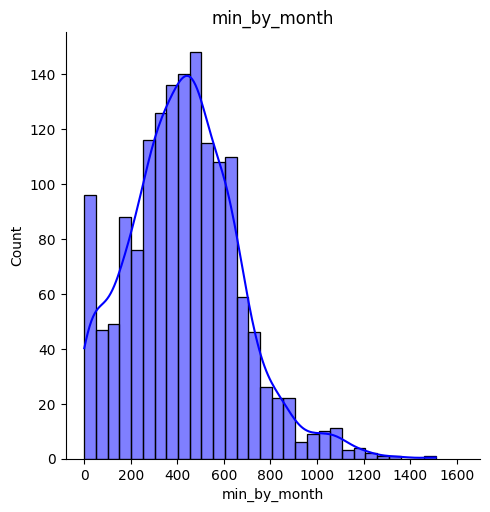

In [108]:
plot_hist(megaline_surf, 'min_by_month', color='blue', bins=30, x_axis=(-80, 1700))

In [116]:
megaline_surf['min_by_month'].describe()

count    1578.000000
mean      427.391001
std       235.318904
min         0.000000
25%       269.250000
50%       424.000000
75%       576.000000
max      1510.000000
Name: min_by_month, dtype: float64

In [117]:
megaline_surf['min_by_month'].var()  # varianza de la columna

55374.986526454035

Teniendo en cuenta que este plan solo da 500 minutos al mes, observamos que los usuarios de este plan usan efectivamente en promedio 427 minutos al mes, y que el 50 % de estos usan 424 minutos al mes. En el gráfico observamos que el pico del histograma también se aproxima a estos valores y que este tiene una asimetría positiva. Se podría decir que, en promedio, *los usuarios del plan "Surf" usan menos minutos de lo que les proporciona su plan*.  Nuestra desviación estándar es de 235 minutos, con una varianza de 55375 (minutos al cuadrado). Esta desviación estándar no parece ser especialmente alta comparada con la media. Tenemos un mínimo de 0 minutos al mes y una gran cantidad de datos agrupados en el primer contenedor cercano a cero, lo cual resulta extraño teniendo en cuenta que eliminamos gran parte de este tipo de datos atípicos. De hecho, esto se dio debido a la unión entre tablas que hicimos, donde posiblemente muchos usuarios no tenían información en este rubro y luego los rellenamos con ceros. Para el otro extremo, a partir de los 1200 minutos los datos se hacen mucho menos frecuentes y también tienen apariencia de outliers.

Para un mejor análisis de los valores extremos, usaremos nuestros diagramas de caja para ayudarnos a delimitarlos:

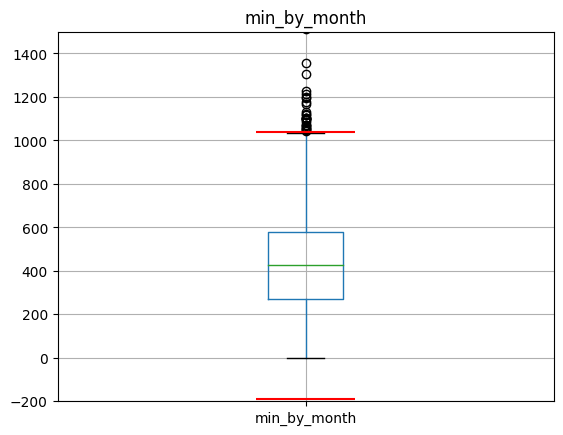

El límite superior es 1036.125
El límite superior es -190.875


In [134]:
plot_boxplot(megaline_surf, 'min_by_month', y_axis=(-200, 1500))

El diagrama de caja nos ayuda a delimitar los valores extremos. Para las llamadas mensuales de los usuario de Surf, el límite máximo de donde se pueden tomar los valores atípicos superiores están hacia alrededor de 1000 minutos. El límite inferior teórico apoya nuestra afirmación del sesgo positivo de nuestros datos.

Ahora continuaremos con los mensajes.

### Mensajes <a id='c12'></a>

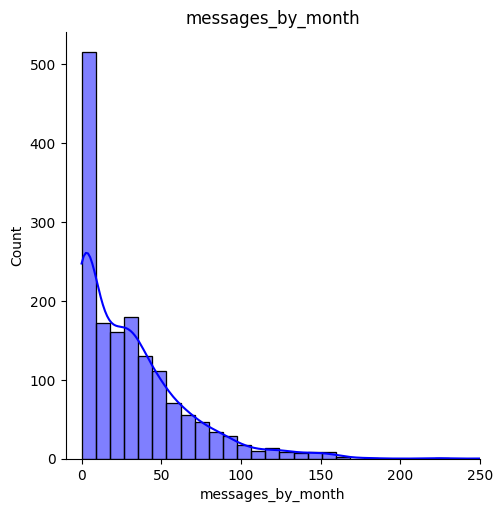

In [140]:
plot_hist(megaline_surf, 'messages_by_month', color='blue', bins=30, x_axis=(-10, 250))

In [141]:
megaline_surf['messages_by_month'].describe()

count    1578.000000
mean       31.060837
std        33.559213
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages_by_month, dtype: float64

In [144]:
megaline_surf['messages_by_month'].var()

1126.2207734279123

El plan Surf solo incluye 50 mensajes de texto al mes dentro de su plan. De los estadísticos podemos afirmar que los usuarios de Surf usan efectivamente en promedio 31 mensajes al mes, y que el 50 % de los usuarios usan 24 mensajes al mes. En el gráfico notamos que el pico (moda) está cerca a cero, mostrando una asimetría positiva más pronunciada. De esto se puede afirmar que, en promedio, *los usuarios del plan "Surf" usan menos mensajes que los proporcionados en su plan*. La desviación estándar es de 33 mensajes, y la varianza de 1126 (mensajes al cuadrado); en este caso, se tratan de valores más altos respecto a la media e indican la alta dispersión de nuestros datos. La diferencia entre media y mediana, así como el gráfico dan indicios claros de valores atípicos, especialmente acumulados en el mínimo de 0 mensajes al mes. Esto también es consecuencia del método de unión de tablas y el llenado de ausentes realizado, de lo cual podemos deducir que hay muchos clientes que no usan su servicio de mensajería incluido. Para el extremo superior, desde los 150 mensajes al mes los valores empiezan a volverse escasos.

Para continuar con el análisis de datos extremos, usaremos un diagrama de caja a continuación:

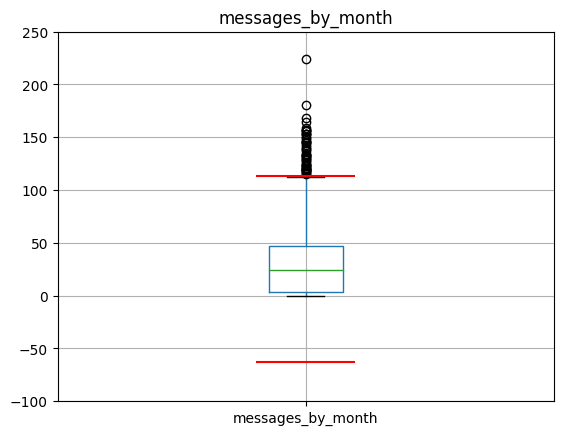

El límite superior es 113.0
El límite superior es -63.0


In [147]:
plot_boxplot(megaline_surf, 'messages_by_month', y_axis=(-100, 250))

El límite superior delimitado por el diagrama de caja es de 113 mensajes, a partir del cual se consideran valores ausentes. Para el otro lado, la gran acumulación de datos hacia el cero nuevamente muestra el fuerte sesgo positivo de la distribución. Este caso parece merecer una especial atención. Buscaremos la moda de la columna ordenando el conteo de valores de la columna:

In [153]:
megaline_surf['messages_by_month'].value_counts(normalize=True).sort_values(ascending=False).head()

0.0     0.225602
11.0    0.019645
24.0    0.019645
3.0     0.018378
4.0     0.017744
Name: messages_by_month, dtype: float64

El 22.5 % de las filas de los mensajes usados por los clientes son ceros. Es decir, un buen porcentaje (la quinta parte o uno de cada cinco) de nuestros clientes del plan "Surf" no usan este servicio. 

Continuamos con el uso de internet.

### Internet <a id='c13'></a>

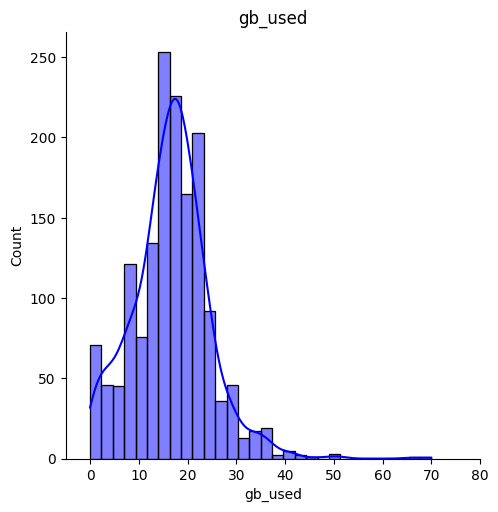

In [155]:
plot_hist(megaline_surf, 'gb_used', color='blue', bins=30, x_axis=(-5, 80))

In [156]:
megaline_surf['gb_used'].describe()

count    1578.000000
mean       16.617871
std         7.890925
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used, dtype: float64

In [157]:
megaline_surf['gb_used'].var()

62.26669375119048

El Plan "Surf" entrega a sus usuarios acceso a 15 GB de datos al mes antes de exceder el límite. Para los datos obtenidos, los usuarios en promedio usan 16 GB de datos de su plan al mes. El 50 % de los usuarios usan 17 GB. El histograma muestra que el pico está cerca a los 15 GB y la diferencia entre media y mediana nos muestra un ligero sesgo. En promedio, *los usuarios del plan "Surf" usan menos de la mitad de los datos que les proporciona su plan*. Al ser un servicio más costoso en su exceso, parece que los usuarios tienden a ser más cautelosos con su uso. La desviación estándar es de 7.9 GB y la varianza de 62 (GB al cuadrado), lo cual muestra una relativa poca dispersión respecto a la media y su valor. Tambíen tenemos un mínimo de 0 GB usados, tratándose posiblemente de usuarios que no usan el servicio. En el otro extremo, los valores empiezan a ser poco frecuentes a partir de 40 GB.

Los límites los observaremos mejor con el gráfico de caja respectivo:

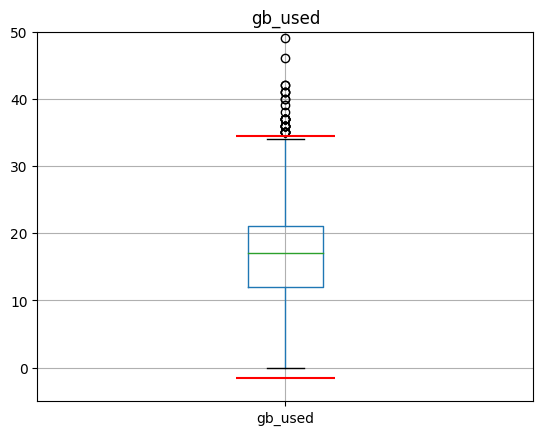

El límite superior es 34.5
El límite superior es -1.5


In [159]:
plot_boxplot(megaline_surf, column='gb_used', y_axis=(-5, 50))

El gráfico de caja y sus límites nos indica que el límite superior en realidad es de 35 GB, a partir del cual los valores se consideran atípicos. La pequeña diferencia en el límite inferior graficado y teórico muestra el ligero sesgo y acumulación de los datos. Como se explicó líneas arriba, los usuarios de internet del plan "Surf" muestran un comportamiento más medido.

La siguiente columna se trata de los ingresos que genera "Surf".

### Ingresos <a id='c14'></a>

[Del mismo modo en que has estudiado el comportamiento del usuario, es decir, estadísticamente, describe el ingreso entre los planes.]

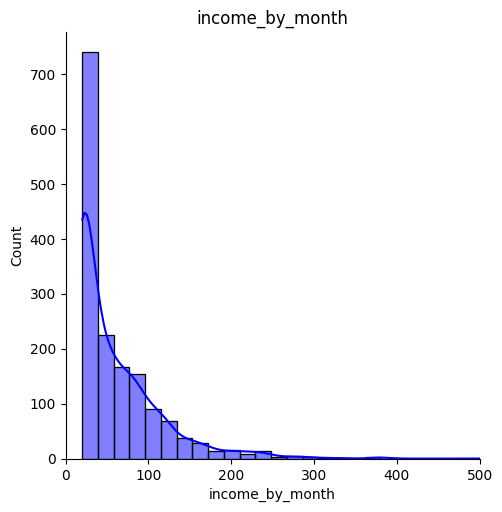

In [161]:
plot_hist(megaline_surf, 'income_by_month', color='blue', bins=30, x_axis=(-0, 500))

In [162]:
megaline_surf['income_by_month'].describe()

count    1578.000000
mean       60.577427
std        55.347497
min        20.000000
25%        20.000000
50%        40.180000
75%        80.322500
max       590.370000
Name: income_by_month, dtype: float64

In [163]:
megaline_surf['income_by_month'].var()

3063.345381074267

En este caso no tenemos un monto a comparar, aunque podemos afirmar que los usuarios del plan "Surf" generan en promedio 60 dólares al mes de ingresos, mientras que el 50 % de estos generan 40 dólares de ingresos mensuales. Esta diferencia entre media y mediana, sumado al gráfico, hace bastante evidente que la mayor parte de nuestros datos están acumulados hacia el monto del pago mensual, de hecho, el 25 % de los usuarios pagan los 20 dólares del plan, un porcetanje relativamente alto. A pesar de que una buena parte de los usuarios Surf solo pagan su tarifario mensual, en promedio, *los usuarios del plan "Surf" generan 60 $ de ingresos mensuales, consumiendo más allá de lo que les proporciona su plan*. La desviación estándar es de 55 dólares y la varianza es de 3063 (dólares al cuadrado), que es relativamente alto comparada a la media, mostrando una relativa alta dispersión de nuestros datos. Acerca de los datos extremos, hacia el lado inferior de los datos, el valor mínimo es de 20 dólares, lo cual es esperable teniendo en cuenta que es el pago mensual mínimo. Para el otro lado, vemos que los ingresos mayores a 200 dólares al mes se vuelven escasos.

Para complementar el análisis de los valores extremos, realizaremos el diagrama de caja respectivo:

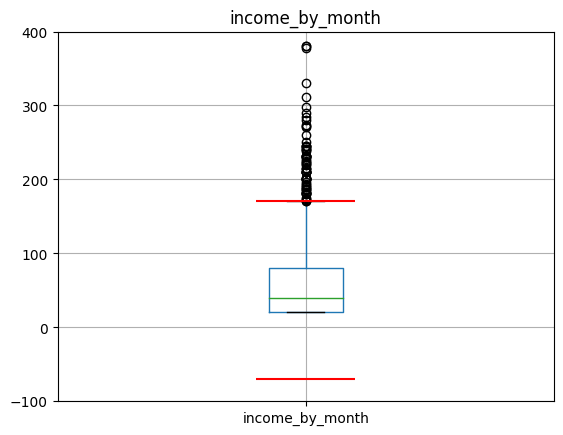

El límite superior es 170.80624999999998
El límite superior es -70.48374999999999


In [171]:
plot_boxplot(megaline_surf, 'income_by_month', y_axis=(-100, 400))

El diagrama muestra la gran acumulación en el lado inferior de la distribución y asigna como valores atípicos a aquellos más allá de 170 $ mensuales. Tendremos esto en cuenta al compararlo con el otro plan, *Ultimate*.

Para tener una idea de su verdadera distribución y una más representativa, vemos muy probable prescindir de estos valores atípicos más adelante. Aunque aclaramos que la gran dispersión y existencia relativa de muchos valores atípicos superiores hace que los ingresos promedio recibidos por la empresa sean más altos.

**Pequeñas conclusiones acerca de los usuarios *Surf***

Podemos resaltar que los usuarios *Surf*, consumen más de los servicios brindados por su plan básico y su pago promedio lo demuestra, también cuentan con una alta dispersión en general. No se tiene claro qué servicio (llamadas, mensajes o internet) es el que hace que el promedio sea bastante mayor que el pago mensual mínimo (aunque se sospecha del internet, por su promedio y costo), pero sí se tiene relativamente claro que estos clientes podrían usar un plan con más prestaciones debido a su comportamiento. Hay una gran oportunidad de mejora para estos clientes y para la empresa.

Para relativizar todo lo encontrado hasta ahora, ahora haremos el análisis exploratorio - descriptivo de los usuarios *Ultimate*.

## Análisis exploratorio y descriptivo para el plan ``ultimate`` <a id='c2'></a>

Empezaremos usando el método "query" para filtar a los usuarios *Ultimate*:

In [172]:
megaline_ultimate = megaline_complete.query('plan == "ultimate"') #slice para plan ultimate
megaline_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 2285
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            723 non-null    int64         
 1   first_name         723 non-null    object        
 2   last_name          723 non-null    object        
 3   age                723 non-null    int64         
 4   city               723 non-null    object        
 5   reg_date           723 non-null    datetime64[ns]
 6   plan               723 non-null    object        
 7   churn_date         52 non-null     datetime64[ns]
 8   month              720 non-null    object        
 9   min_by_month       723 non-null    float64       
 10  calls_by_month     723 non-null    float64       
 11  messages_by_month  723 non-null    float64       
 12  gb_used            723 non-null    float64       
 13  income_by_month    723 non-null    float64       
 14  region   

Empezaremos con las llamadas.

### Llamadas <a id='c21'></a>

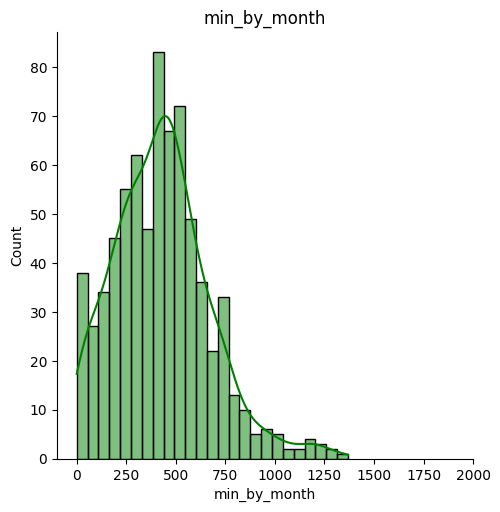

In [178]:
plot_hist(megaline_ultimate, 'min_by_month', color='green', bins=25, x_axis=(-100, 2000))

In [176]:
megaline_ultimate['min_by_month'].describe()

count     723.000000
mean      428.663900
std       241.600519
min         0.000000
25%       259.000000
50%       422.000000
75%       564.500000
max      1369.000000
Name: min_by_month, dtype: float64

In [177]:
megaline_ultimate['min_by_month'].var()

58370.810703325245

El plan *Ultimate* da a sus usuarios 3000 minutos al mes sin cobros, el cual resulta una cantidad bastante generosa teniendo en cuenta que los usuarios en promedio usan solo 429 minutos mensuales, y el 50 % de ellos usan 422 de sus minutos mensuales. En el histograma notamos que el pico está cerca a estos valores, así como se tiene una ligera asimetría positiva. La desviación estándar es de 241 minutos mensuales y la varianza de 58371, siendo no tan relativamente grande respecto a la media. Si comparamos con los usuarios *Surf*, el comportamiento no es muy diferente, tanto en media como el la forma de la distribución. Las diferencias más sustanciales solo se dan por la diferencia de usuarios de cada plan. Hacia el lado inferior, tenemos una pequeña agrupación de datos hacia valores cercanos a cero, que indica a los clientes que no hacen uso de sus minutos, al igual que los usuarios *Surf*. Hacia el lado superior, valores más allá de 1250 parecen ser escasos y atípicos.

Continuaremos con el gráfico de caja.

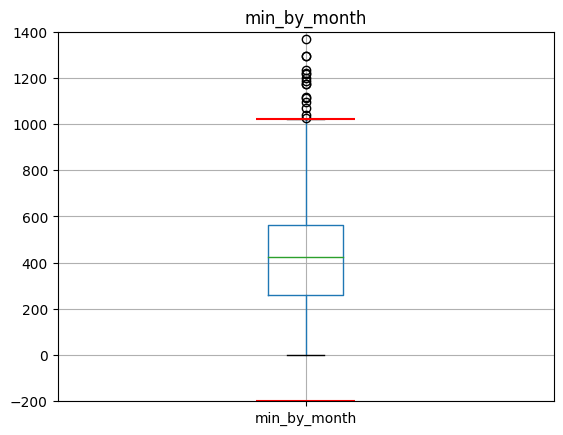

El límite superior es 1022.75
El límite superior es -199.25


In [179]:
plot_boxplot(megaline_ultimate, 'min_by_month', (-200, 1400))

Este diagrama nos muestra que el límite superior es de 1023 llamadas mensuales. Hacia el lado inferior nuevamente notamos la agrupación de datos. Estos límites no difieren mucho de los usuarios *Surf*, por tanto, en ambos casos los clientes tienden a tener un comportamiento parecido.

Para capturar parte de la naturaleza de la distribución de llamadas, el límite superior será fijado en 1100 al momento de filtrar los valores atípicos.

### Mensajes <a id='c22'></a>

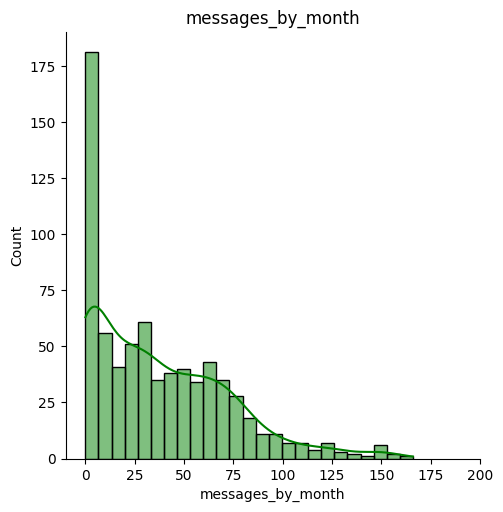

In [184]:
plot_hist(megaline_ultimate, 'messages_by_month', 'green', 25, (-10, 200))

In [182]:
megaline_ultimate['messages_by_month'].describe()

count    723.000000
mean      37.395574
std       34.778859
min        0.000000
25%        6.500000
50%       30.000000
75%       60.500000
max      166.000000
Name: messages_by_month, dtype: float64

In [183]:
megaline_ultimate['messages_by_month'].var()

1209.5690662559434

El plan *Ultimate* da 1000 mensajes al mes antes de exceder su límite, y de igual forma que en las llamadas, es bastante comparado a lo que efectivamente usan sus usuarios al mes: 37 mensajes en promedio, y el 50 % de los usuarios *Ultimate* solo usan 30 mensajes al mes. El gráfico muestra un pico (moda) cerca a cero, también teniendo una asimetría positiva más pronunciada. La desviación estándar de 34 mensajes y varianza de 1209 (mensajes al cuadrado) indican una dispersión más elevada de los datos. Este comportamiento es bastante similar al de los usuarios *Surf*, tanto en la distribución, como en media y mediana. Hacia el lado inferior la agrupación hacia el cero muestra a los usuarios que no usan mensajes, una gran proporción. Hacia el lado superior, desde los 150 mensajes se podrían considerar valores atípicos.

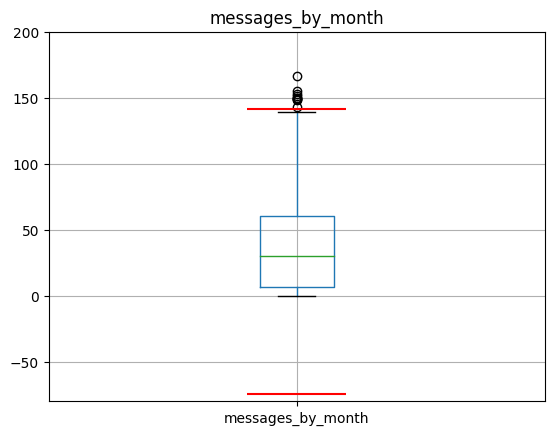

El límite superior es 141.5
El límite superior es -74.5


In [186]:
plot_boxplot(megaline_ultimate, 'messages_by_month', (-80, 200))

El gráfico de caja también muestra que el límite superior desde el cual los valores son atípicos es de 142 mensajes mensuales. El límite inferior muestra la gran agrupación de datos en esta zona de la distribución. También analizaremos un poco más a estos valores ceros ubicando la moda de la distribución:

In [188]:
megaline_ultimate['messages_by_month'].value_counts(normalize=True).sort_values(ascending=False).head()

0.0     0.192254
2.0     0.017981
30.0    0.017981
15.0    0.016598
13.0    0.016598
Name: messages_by_month, dtype: float64

Tenemos que alrededor del 19 % de los usuarios *Ultimate* no usan el servicio. Nuevamente, 1 de cada 5 usuarios no usan el servicio, proporción bastante similar al de usuarios *Surf*.

Continuamos con el uso de internet.

### Internet <a id='c23'></a>

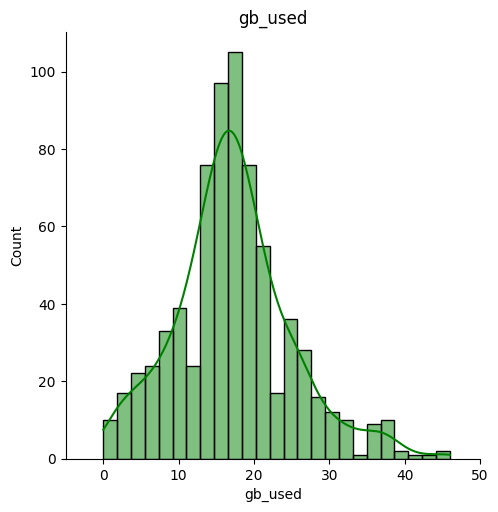

In [194]:
plot_hist(megaline_ultimate, 'gb_used', 'green', 25, (-5, 50))

In [195]:
megaline_ultimate['gb_used'].describe()

count    723.000000
mean      17.235131
std        7.734696
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used, dtype: float64

In [196]:
megaline_ultimate['gb_used'].var()

59.825523078278785

Si tenemos en cuenta que el plan *Ultimate* da a sus usuarios hasta 30 GB de datos mensuales, los clientes en promedio solo usan 17 GB de sus datos mensuales. El 50 % de los usuarios también usan 17 GB de sus datos al mes. El histograma muestra un pico para esos valores aproximadamente, y parece ser más simétrico respecto a todas las anteriores distribuciones. La desviación estándar es de 7 GB (aprox.) y su varianza de 60 (GB al cuadrado). En general, los estadísticos y la distribución se parecen bastante al comportamiento de los usuarios *Surf*. Tenemos un minimo de cero GB al mes, que correspondería a los usuarios que no hacen uso de sus datos. Para el lado superior, notamos que desde los 40 GB al mes los valores son poco frecuentes. El valor máximo registrado es del 46 GB.

Observaremos mejor los límites de valores atípicos con los gráficos de caja.

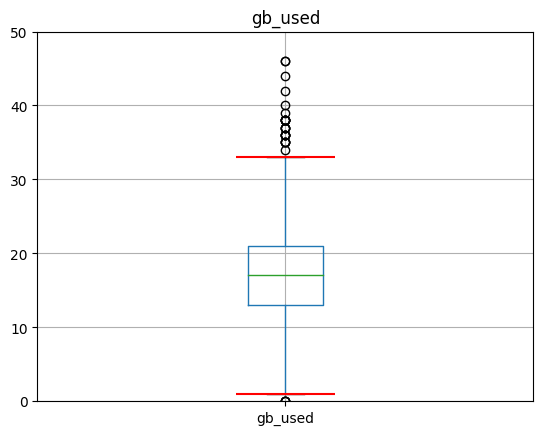

El límite superior es 33.0
El límite superior es 1.0


In [198]:
plot_boxplot(megaline_ultimate, 'gb_used', (0, 50))

De hecho, usando la lógica del rango intercuartil, el límite superior se recomienda para 33 GB mensuales, a partir del cual se consideran outliers (superiores). Para el lado opuesto, se toma como 1 GB al límite inferior. La relativa poca dispersión muestra que también los usuarios *Ultimate* usan un poco más de la mitad de sus datos proporcionados por su plan. 

Se podría decir que en general, los usuarios de ambos planes tienen usos similares de los distintos servicios proporcionados por sus planes. Ahora analizaremos los ingresos generados por los usuarios *Ultimate*.

### Ingresos <a id='c24'></a>

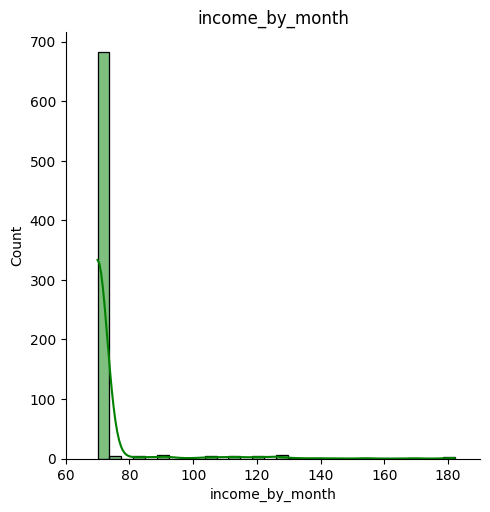

In [205]:
plot_hist(megaline_ultimate, 'income_by_month', 'green', 30, (60, 190))

In [202]:
megaline_ultimate['income_by_month'].describe()

count    723.000000
mean      72.304288
std       11.372383
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: income_by_month, dtype: float64

In [203]:
megaline_ultimate['income_by_month'].var()

129.33110347390644

El usuario promedio del plan *Ultimate* genera 72 dólares mensuales de ingresos a la empresa, y el 50 % de ellos pagan 70 dólares al mes. Es decir, en promedio, *un usuario "Ultimate" no se excede de su plan en demasía*. De hecho, la distribución muestra algo acorde a lo esperado: la mayor parte de los usuarios *Ultimate* generan solo los ingresos de su plan principal. Teniendo en cuenta que en los anteriores análisis los casos que superaban al límite del plan eran pocos, este era un resultado esperable. Teniendo en cuenta esto, debido a la naturaleza de la distribución, no podemos declarar fácilmente límites para los valores atípicos, aunque recordemos que para los usuarios *Surf*, logramos deducir que los valores atípicos estaban más allá de los 170 dólares. En base a esto podemos tener una referencia y prescindir de valores más allá de los 200, para considerar la naturaleza asimétrica de ambas distribuciones.

**Pequeñas conclusiones acerca de los usuarios *Ultimate***

Después de comparar el comportamiento de ambos planes, podemos afirmar que los clientes *Ultimate* no difieren mucho en su comportamiento respecto a los del plan *Surf* y eso causa que no usen todo lo que su plan *Ultimate* les proporciona. En todas las distribuciones notamos una dispersión también es parecida, pero el plan acapara dentro de sus límites a la mayor parte del uso de servicios móviles de sus usuarios. Podríamos decir también que este plan podría ajustarse un poco mejor al uso de la mayor parte de los clientes de la empresa. Nos falta determinar qué plan es el que estadisticamente genera más ingresos a la empresa, pero antes, filtraremos a los valores atípicos.

## Trabajando con los valores atípicos <a id='c3'></a>

Haremos un pequeño resumen para luego aplicar en nuestro filtrado final:
* Para las llamadas, el límite aproximado para ambos planes es de 1030, pero tomaremos 1040 para capturar la asimetría de sus distribuciones.
* Para los mensajes, el límite aproximado para ambos planes es de 130, aunque tomaremos 140 para capturar la naturaleza asimétrica de estas distribuciones.
* Para el uso de internet, el límite aproximado para ambos planes es de 33, aunque tomaremos como 35 al valor de referencia y mantendremos los valores inferiores para compensar la simetría.
* Para los ingresos, el límite lo definimos para los 200 dólares al mes.

Aplicaremos estos filtros a nuestra tabla ``megaline_complete``.

In [209]:
megaline_final = megaline_complete.query("min_by_month < 1040 and messages_by_month < 140 and gb_used < 35 and income_by_month < 200")
# filtrado final en base a lo hallado
megaline_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2162 entries, 0 to 2300
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2162 non-null   int64         
 1   first_name         2162 non-null   object        
 2   last_name          2162 non-null   object        
 3   age                2162 non-null   int64         
 4   city               2162 non-null   object        
 5   reg_date           2162 non-null   datetime64[ns]
 6   plan               2162 non-null   object        
 7   churn_date         156 non-null    datetime64[ns]
 8   month              2154 non-null   object        
 9   min_by_month       2162 non-null   float64       
 10  calls_by_month     2162 non-null   float64       
 11  messages_by_month  2162 non-null   float64       
 12  gb_used            2162 non-null   float64       
 13  income_by_month    2162 non-null   float64       
 14  region  

In [212]:
print(f"Valores atípicos eliminados: {(len(megaline_complete)/len(megaline_final)) - 1}")

Valores atípicos eliminados: 0.06429232192414425


Nuestra tabla final tiene alrededor del 6.4 % menos de los datos. Ahora tenemos 2162 filas en nuestro dataset final. Como último paso antes de las pruebas de hipótesis, compararemos las distribuciones de cada servicio en nuestros datasets sin filtrar y filtrado, respectivamente:

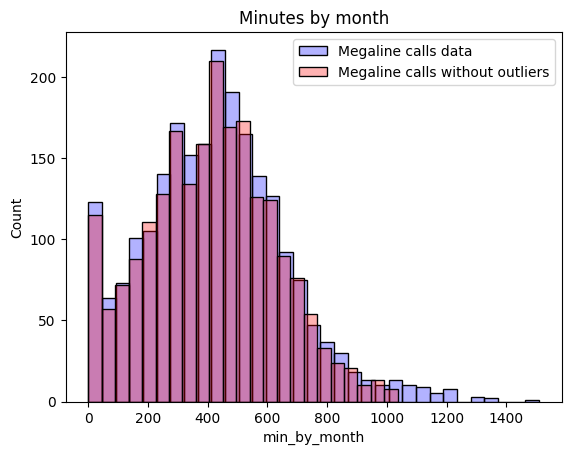

In [217]:
sns.histplot(megaline_complete, x='min_by_month', color='blue', alpha=0.3, label='Megaline calls data')
sns.histplot(megaline_final, x='min_by_month', color='red', alpha=0.3, label='Megaline calls without outliers')
plt.title('Minutes by month')
plt.legend()
plt.show()

In [222]:
megaline_complete['min_by_month'].describe()

count    2301.000000
mean      427.790960
std       237.258694
min         0.000000
25%       263.000000
50%       424.000000
75%       572.000000
max      1510.000000
Name: min_by_month, dtype: float64

In [223]:
megaline_final['min_by_month'].describe()

count    2162.000000
mean      411.532840
std       214.322492
min         0.000000
25%       259.000000
50%       416.000000
75%       556.750000
max      1037.000000
Name: min_by_month, dtype: float64

Podemos observar que la distribución de las llamadas no cambia drásticamente en su forma al prescindir de los valores atípicos. En su resumen estadístico podemos ver que la elimincación de outliers redujo de 427 a 411 minutos mensuales usados. La desviación estándar también se redujo de 237 a 214 minutos al mes. Algo notorio es que nuestra distribución ha mejorado su simetría al comparar media y mediana. Aunque aún tenemos una cierta cantidad de valores cercanos a cero.

Ahora haremos el análisis para los mensajes.

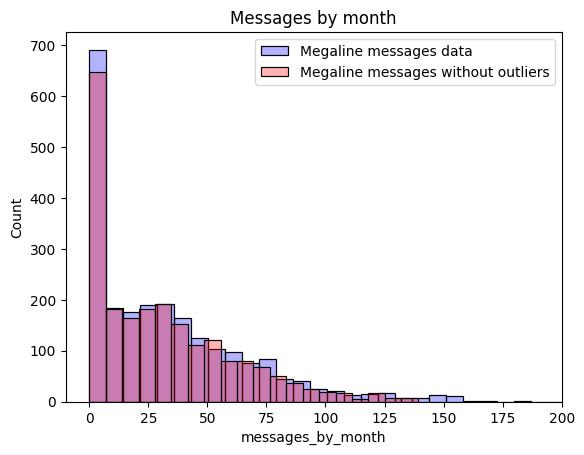

In [231]:
sns.histplot(megaline_complete, x='messages_by_month', color='blue', alpha=0.3, label='Megaline messages data')
sns.histplot(megaline_final, x='messages_by_month', color='red', alpha=0.3, label='Megaline messages without outliers')
plt.title('Messages by month')
plt.xlim(-10, 200)
plt.legend()
plt.show()

#gráfico de seaborn para ambas distribuciones a la vez

In [224]:
megaline_complete['messages_by_month'].describe()

count    2301.000000
mean       33.051282
std        34.066788
min         0.000000
25%         3.000000
50%        25.000000
75%        51.000000
max       266.000000
Name: messages_by_month, dtype: float64

In [225]:
megaline_final['messages_by_month'].describe()

count    2162.000000
mean       30.184089
std        29.820679
min         0.000000
25%         3.000000
50%        24.000000
75%        48.000000
max       139.000000
Name: messages_by_month, dtype: float64

La distribución de los mensajes mantiene bastante bien su forma previa. La media se redujo de 33 a 30 mensajes al mes. La desviación estándar también muestra una reducción de 34 a 29 mensajes mensuales, es decir, la dispersión de los datos es ligeramente menor. Vale aclarar que aún tenemos una gran cantidad de valores ceros en la distribución.

Continuamos con el uso de internet.

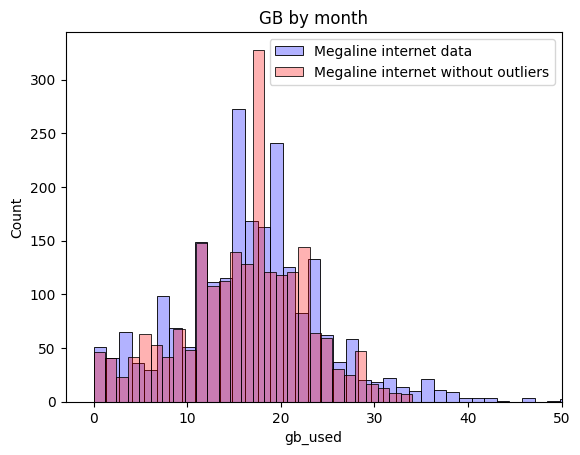

In [234]:
sns.histplot(megaline_complete, x='gb_used', color='blue', alpha=0.3, label='Megaline internet data')
sns.histplot(megaline_final, x='gb_used', color='red', alpha=0.3, label='Megaline internet without outliers')
plt.title('GB by month')
plt.xlim(-3, 50)
plt.legend()
plt.show()

In [226]:
megaline_complete['gb_used'].describe()

count    2301.000000
mean       16.811821
std         7.845728
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used, dtype: float64

In [227]:
megaline_final['gb_used'].describe()

count    2162.000000
mean       16.025439
std         6.721869
min         0.000000
25%        12.000000
50%        17.000000
75%        20.000000
max        34.000000
Name: gb_used, dtype: float64

Podríamos decir que los histogramas muestran cambios algo notorios: se genera un pico donde antes no había, y los otros reducen su tamaño. A pesar de la eliminación de outliers, la media y mediana apenas muestra variación, y la desviación estándar también muestra una pequeña disminución. 

Finalmente, los ingresos.

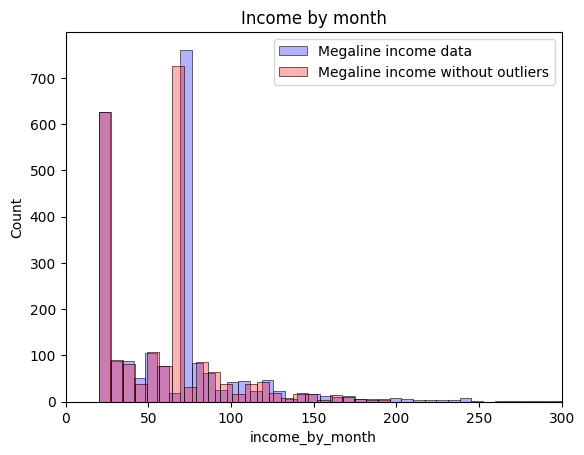

In [230]:
sns.histplot(megaline_complete, x='income_by_month', color='blue', alpha=0.3, label='Megaline income data')
sns.histplot(megaline_final, x='income_by_month', color='red', alpha=0.3, label='Megaline income without outliers')
plt.title('Income by month')
plt.xlim(0, 300)
plt.legend()
plt.show()

In [228]:
megaline_complete['income_by_month'].describe()

count    2301.000000
mean       64.262138
std        46.590064
min        20.000000
25%        23.420000
50%        70.000000
75%        70.000000
max       590.370000
Name: income_by_month, dtype: float64

In [229]:
megaline_final['income_by_month'].describe()

count    2162.000000
mean       58.671105
std        34.001012
min        20.000000
25%        21.830000
50%        70.000000
75%        70.000000
max       196.420000
Name: income_by_month, dtype: float64

Resaltan los dos picos de la distribución que se relacionan al precio de cada plan. Más allá, no se observan cambios en la forma de la distribución. La media decrece de 64 a 58 dólares al mes, y la desviación estándar muestra una más notoria caída de 46 a 34 dólares al mes, evidenciando una menor dispersión luego de eliminar los datos atípicos.

Finalmente, luego de observar que nuestros datos no sufrieron grandes cambios al prescindir de los valores atípicos, este será la data a usar para probar nuestras hipótesis, labor que será la próxima a continuación.

**Pequeñas conclusiones del apartado**

En este apartado realizamos el análisis exploratorio y descriptivo de los datos, describiendo el comportamiento del usuario por planes y servicio, comparando sus diferencias y similitudes. Pudimos observar la gran similitud entre el comportamiento de los clientes sin importar el plan que usaban, excepto en los ingresos que estos generan a la empresa, donde se ve una distribución más dispersa para los usuarios *Surf* porque una parte de ellos tiende a exceder el límite de su plan.

También determinamos los límites para los cuales se consideran valores normales y atípicos en nuestras distribuciones, y aplicando los filtros necesarios obtuvimos el dataset final para finalmente realizar las pruebas de hipótesis.

# Probar las hipótesis estadísticas <a id='d'></a>

Para realizar nuestras pruebas de hipótesis, necesitamos filtrar nuestro dataset para cada hipótesis en particular. Nuestra primera hipótesis es probar si existe una diferencia entre el ingreso medio de los usuarios *Surf* y *Ultimate*.

### Primera hipótesis: diferencia entre el ingreso promedio de *Surf* y *Ultimate* <a id='d1'></a>

Guardaremos los datos en dos datasets llamados ``surf_final`` y ``ultimate_final``.

In [236]:
surf_final = megaline_final.query("plan == 'surf'") # filtra para plan surf
surf_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 1 to 2300
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            1488 non-null   int64         
 1   first_name         1488 non-null   object        
 2   last_name          1488 non-null   object        
 3   age                1488 non-null   int64         
 4   city               1488 non-null   object        
 5   reg_date           1488 non-null   datetime64[ns]
 6   plan               1488 non-null   object        
 7   churn_date         104 non-null    datetime64[ns]
 8   month              1483 non-null   object        
 9   min_by_month       1488 non-null   float64       
 10  calls_by_month     1488 non-null   float64       
 11  messages_by_month  1488 non-null   float64       
 12  gb_used            1488 non-null   float64       
 13  income_by_month    1488 non-null   float64       
 14  region  

In [237]:
ultimate_final = megaline_final.query("plan == 'ultimate'") # filtra para plan ultimate
ultimate_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 2285
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            674 non-null    int64         
 1   first_name         674 non-null    object        
 2   last_name          674 non-null    object        
 3   age                674 non-null    int64         
 4   city               674 non-null    object        
 5   reg_date           674 non-null    datetime64[ns]
 6   plan               674 non-null    object        
 7   churn_date         52 non-null     datetime64[ns]
 8   month              671 non-null    object        
 9   min_by_month       674 non-null    float64       
 10  calls_by_month     674 non-null    float64       
 11  messages_by_month  674 non-null    float64       
 12  gb_used            674 non-null    float64       
 13  income_by_month    674 non-null    float64       
 14  region   

Ahora obtendremos los estadísticos principales de las variables a comparar.

In [239]:
surf_final['income_by_month'].describe()

count    1488.000000
mean       53.374953
std        39.838389
min        20.000000
25%        20.000000
50%        40.000000
75%        80.000000
max       196.420000
Name: income_by_month, dtype: float64

In [240]:
ultimate_final['income_by_month'].describe()

count    674.000000
mean      70.363501
std        2.548181
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max       98.000000
Name: income_by_month, dtype: float64

Tenemos una ingreso promedio de los usuarios *Surf* de 53 dólares mensuales, y para los usuarios *Ultimate* de 70. También podemos notar que las desviaciones estándar son bastante diferentes. Para determinar qué prueba t (varianzas iguales o diferentes) usar, estableceremos si estas son estadísticamente diferentes mediante el test de Levene de la librería SciPy.

Este test tiene las siguientes hipótesis:

- $H_0:$ las varianzas de ambas distribuciones son iguales.
- $H_1:$ no se comprueba $H_0$.

Nivel de significancia $\alpha = 0.05$

Criterio de decisión: Si  p-value $< \alpha$, se rechaza $H_0$. De lo contrario, no se rechaza $H_0$.

In [241]:
st.levene(surf_final['income_by_month'], ultimate_final['income_by_month']) # test de Levene

LeveneResult(statistic=758.627660458677, pvalue=2.2066300007845614e-143)

Dado que el pvalue del test es mucho menor que nuestro $\alpha$, rechazamos nuestra hipótesis nula de que las varianzas son iguales. Por tanto, usaremos el t-test de varianzas diferentes.

Hipótesis nula: $H_0: \bar{x}_{surf} = \bar{x}_{ultimate}$

Hipótesis alternativa: $H_1: \bar{x}_{surf} \neq \bar{x}_{ultimate}$

Nivel de significancia $\alpha = 0.05$

Criterio de decisión: Si  $p-value_t < \alpha$, se rechaza $H_0$. De lo contrario, no se rechaza $H_0$.

In [245]:
alpha = 0.05

result_1 = st.ttest_ind(surf_final['income_by_month'], ultimate_final['income_by_month'], equal_var=False) #t-test de varianzas diferentes

print(f"p-value: {result_1.pvalue}") # si el pvalue es menor que el resultado

if result_1.pvalue < alpha:
    print("Rechazamos la hipótesis nula") # rechaza H0
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.2866111541102786e-55
Rechazamos la hipótesis nula


Ahora podemos rechazar la hipótesis nula que los ingresos promedios mensuales de ambos planes son iguales, es decir, tenemos bastante certeza estadística de que son diferentes, incluso tomando un $\alpha = 0.01$ De hecho, parece que los ingresos generados por los usuarios *Ultimate* son mayores respecto a los de *Surf*. 

Sin embargo, para determinar qué plan es más rentable o no para la empresa, se tendrían que restar los costos operativos por persona de cada plan, aunque dado el comportamiento similar de usuarios de ambos planes, se esperaría que también los beneficios netos sean mayores en el plan *Ultimate*. Esta podría ser una oportunidad de mejora tanto para los clientes como para la empresa.

### Segunda hipótesis: diferencia entre el ingreso promedio de los estados *Nueva York - Nueva Jersey* y otras regiones <a id='d2'></a>

También empezaremos segmentando nuestro set final de datos filtrados para las regiones. Se guardarán en dos respectivos datasets:

In [246]:
ny_nj_final = megaline_final.query("region == 'ny-nj'") # filtra para los ny-nj
ny_nj_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 57 to 2296
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            461 non-null    int64         
 1   first_name         461 non-null    object        
 2   last_name          461 non-null    object        
 3   age                461 non-null    int64         
 4   city               461 non-null    object        
 5   reg_date           461 non-null    datetime64[ns]
 6   plan               461 non-null    object        
 7   churn_date         34 non-null     datetime64[ns]
 8   month              460 non-null    object        
 9   min_by_month       461 non-null    float64       
 10  calls_by_month     461 non-null    float64       
 11  messages_by_month  461 non-null    float64       
 12  gb_used            461 non-null    float64       
 13  income_by_month    461 non-null    float64       
 14  region  

In [248]:
other_regions_final = megaline_final.query("region == 'other'") # filtra para otras regiones
other_regions_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701 entries, 0 to 2300
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            1701 non-null   int64         
 1   first_name         1701 non-null   object        
 2   last_name          1701 non-null   object        
 3   age                1701 non-null   int64         
 4   city               1701 non-null   object        
 5   reg_date           1701 non-null   datetime64[ns]
 6   plan               1701 non-null   object        
 7   churn_date         122 non-null    datetime64[ns]
 8   month              1694 non-null   object        
 9   min_by_month       1701 non-null   float64       
 10  calls_by_month     1701 non-null   float64       
 11  messages_by_month  1701 non-null   float64       
 12  gb_used            1701 non-null   float64       
 13  income_by_month    1701 non-null   float64       
 14  region  

También tenemos diferentes tamaños en nuestras muestras. Ahora los estadísticos de sus ingresos:

In [249]:
ny_nj_final['income_by_month'].describe()

count    461.000000
mean      55.669653
std       37.869561
min       20.000000
25%       20.000000
50%       50.030000
75%       70.000000
max      193.350000
Name: income_by_month, dtype: float64

In [250]:
other_regions_final['income_by_month'].describe()

count    1701.000000
mean       59.484550
std        32.839167
min        20.000000
25%        24.200000
50%        70.000000
75%        70.000000
max       196.420000
Name: income_by_month, dtype: float64

Si bien el ingreso promedio de usuarios de Nueva York - Nueva Jersey (56 dólares) no difiere mucho de los de los otros estados (59 dólares) y tampoco lo hacen mucho sus desviaciones estándar, igual será necesario probar si sus varianzas son estadísticamente iguales (o diferentes) mediante el test de Levene para decidir qué t-test usaremos luego. Nuevamente:

- $H_0:$ las varianzas de ambas distribuciones son iguales.
- $H_1:$ no se comprueba $H_0$.

Nivel de significancia $\alpha = 0.05$

Criterio de decisión: Si  p-value $< \alpha$, se rechaza $H_0$. De lo contrario, no se rechaza $H_0$.

In [251]:
st.levene(ny_nj_final['income_by_month'], other_regions_final['income_by_month'])   # test de Levene

LeveneResult(statistic=19.421662387608976, pvalue=1.099422157015025e-05)

Dado que el pvalue del test es mucho menor que nuestro $\alpha$, rechazamos nuestra hipótesis nula de que las varianzas son iguales; esto a pesar de que las desviaciones estándar se mostraban parecidas. Por tanto, usaremos el t-test de varianzas diferentes.

Hipótesis nula: $H_0: \bar{x}_{Nueva York-Jersey} = \bar{x}_{other}$

Hipótesis alternativa: $H_1: \bar{x}_{Nueva York-Jersey} \neq \bar{x}_{other}$

Nivel de significancia $\alpha = 0.05$

Criterio de decisión: Si  $p-value_t < \alpha$, se rechaza $H_0$. De lo contrario, no se rechaza $H_0$.

In [261]:
result_2 = st.ttest_ind(ny_nj_final['income_by_month'], other_regions_final['income_by_month'], equal_var=False) #t-test de varianzas distintas

print(f"p-value: {result_2.pvalue}")

if result_2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.04910039421877621
Rechazamos la hipótesis nula


En este caso, a primera vista tenemos que se rechaza la hipótesis nula de igualdad de ingresos promedio entre las regiones Nueva York - Nueva Jersey respecto al de otras regiones. Pareciera que los ingresos generados en otras áreas y regiones son ligeramente mayores que los de la región Nueva York - Nueva Jersey.

Sin embargo, este resultado puede ser engañoso dado que el p-value está muy cerca del límite. Podría decirse que es una evidencia débil a favor del rechazo de la hipótesis nula, ya que si cambiamos nuestro nivel de significancia hacia un 0.01, no podríamos rechazar la hipótesis nula. En este caso se recomendaría tomar una muestra mayor para así tener más certeza estadística de nuestros resultados y conclusiones, teniendo en cuenta las limitaciones de la estadística convencional y paramétrica utilizada en este proyecto.

# Conclusión general <a id='e'></a>

**Conclusiones del preprocesamiento de los datos**

- Para cada tabla de los diferentes servicios se hallaron ciertos problemas con formatos de fechas, tipos y unidades de medida que fueron solucionados.
- Enriquecimos los datos analizando por tablas, teniendo como mayor supuesto que los clientes de cada plan pagan sus respectivas tarifas sin importar si utilizan el servicio efectivamente o no.
- Unimos estas tablas y al encontrar valores ausentes decidimos llenarlos con ceros.
- Bajo el supuesto de que los clientes pagan sus tarifas, obtuvimos los ingresos mensuales por usuario para cada plan.
- Separamos a los usuarios del área de Nueva York - Nueva Jersey respecto al de otras regiones para facilitar la prueba de hipótesis respectiva.

**Conclusiones del análisis estadístico y descriptivo de los datos**

- Realizamos gráficos (histogramas y cajas) para los servicios e ingresos utilizados al mes, separando para cada plan. Concluimos que no existen grandes diferencias en el comportamiento de los usuarios de ambos planes, excepto en los ingresos que estos generan a la empresa.
- Delimitamos los límites para los valores normales y atípicos, para luego generar un dataset final con el que probar nuestras hipótesis.

**Conclusiones de las pruebas de hipótesis** 

- Para ambas hipótesis, la prueba de Levene concluyó que las diferentes muestras comparadas tenían varianzas diferentes, lo cual nos llevó a utilizar la prueba t de Student para varianzas diferentes en ambas pruebas de hipótesis.
- No pudimos demostrar que los usuarios *Surf* y *Ultimate* generen los mismos ingresos. De hecho, es bastante probable que los ingresos generados por el plan *Ultimate* sean mayores.
- No pudimos demostrar que los usuarios de Nueva York - Nueva Jersey y los de otras regiones generen los mismos ingresos, pero de una manera muy débil. Esta falta de certeza nos lleva a recomendar un uso de una muestra más grande o de otro enfoque para probar esta hipótesis.

**Recomendaciones**

- Dados los resultados para cada plan, se recomienda hacer un análisis de los costos mensuales por usuario para determinar también de manera estadística qué plan genera mayores beneficios a la empresa. En términos generales, el plan *Ultimate* se acomoda mejor al uso de la mayor parte de los usuarios de la empresa, así como mayores ingresos. Enfocarse en promocionar este plan podría ser una buena estrategia para el área respectiva.
- Dado el resultado para las regiones, antes de realizar un plan dirigido por áreas, se recomienda utilizar otras muestras, obtener muestras más grandes, analizar otras regiones, utilizar un enfoque no paramétrico, etc. para así no incurrir en riesgos y/o costos extra.
- Resultaría conveniente analizar a los usuarios que se presentan registrados, pero que no hacen uso de su plan o de algunos de los servicios proporcionados por la empresa, realmente pagan su tarifa. Este porcentaje podría determinar si la diferencia entre ingresos generados por un plan u otro puede ser aún mayor o menor, según el caso.
- Hay que tener en cuenta las limitaciones de la estadística utilizada en las pruebas de hipótesis y el valor de nuestro nivel de significancia utilizado al momento de tomar decisiones al respecto.